In [152]:
import os
import warnings
warnings.filterwarnings('ignore')

In [153]:
import pandas as pd
import numpy as np
from statistics import mode

In [154]:
# Read train data
train = pd.read_csv('train.csv')

# Have a first look at train data
print('Train shape:', train.shape)

Train shape: (164309, 14)


In [155]:
# Have a look at first 5 data observations
train.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


In [156]:
# Have a look at last 5 data observations
train.tail()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
164304,10164305,"20,725",10+ years,Rent,NaN,VERIFIED - income source,credit_card,13.56,0,NaN,13,16,Male,2
164305,10164306,"6,000",8 years,Own,NaN,VERIFIED - income source,small_business,9.12,0,36.0,13,30,Male,2
164306,10164307,"20,250",10+ years,Mortgage,NaN,VERIFIED - income,credit_card,18.17,1,NaN,17,30,Male,1
164307,10164308,"10,000",4 years,Rent,NaN,not verified,major_purchase,18.75,1,48.0,16,62,Female,3
164308,10164309,"9,250",10+ years,Rent,NaN,VERIFIED - income,credit_card,19.44,1,NaN,5,9,Female,2


In [157]:
train['Length_Employed'] = train['Length_Employed'].str.replace('<','')
train['Length_Employed'] = train['Length_Employed'].str.replace('+','')
train['Length_Employed'] = train['Length_Employed'].str.replace('year','')
train['Length_Employed'] = train['Length_Employed'].str.replace('s','')

In [158]:
train.isnull().mean().sort_values(ascending = False)

Months_Since_Deliquency    0.537883
Home_Owner                 0.154276
Annual_Income              0.152773
Length_Employed            0.044861
Interest_Rate              0.000000
Gender                     0.000000
Total_Accounts             0.000000
Number_Open_Accounts       0.000000
Inquiries_Last_6Mo         0.000000
Debt_To_Income             0.000000
Purpose_Of_Loan            0.000000
Income_Verified            0.000000
Loan_Amount_Requested      0.000000
Loan_ID                    0.000000
dtype: float64

In [159]:
# Read test data
test = pd.read_csv('test.csv')

# Have a first look at test data
print('Test shape:', test.shape)

Test shape: (109541, 13)


In [160]:
# Have a look at train and test columns
print('Train columns:', train.columns.tolist())
print('Test columns:', test.columns.tolist())

Train columns: ['Loan_ID', 'Loan_Amount_Requested', 'Length_Employed', 'Home_Owner', 'Annual_Income', 'Income_Verified', 'Purpose_Of_Loan', 'Debt_To_Income', 'Inquiries_Last_6Mo', 'Months_Since_Deliquency', 'Number_Open_Accounts', 'Total_Accounts', 'Gender', 'Interest_Rate']
Test columns: ['Loan_ID', 'Loan_Amount_Requested', 'Length_Employed', 'Home_Owner', 'Annual_Income', 'Income_Verified', 'Purpose_Of_Loan', 'Debt_To_Income', 'Inquiries_Last_6Mo', 'Months_Since_Deliquency', 'Number_Open_Accounts', 'Total_Accounts', 'Gender']


In [161]:
# Load our plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

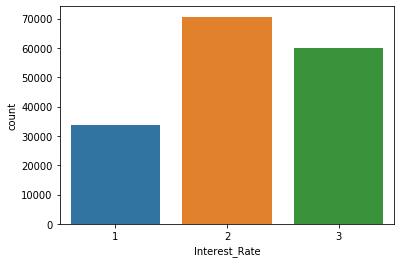

In [162]:
# Countplot for 'Interest_Rate' variable
sns.countplot(train['Interest_Rate'])

In [163]:
# Let's calculate the mean of our target
round(np.mean(train['Interest_Rate']), 2)

2.16

In [164]:
# Convert to numeric
train["Loan_Amount_Requested"] = train["Loan_Amount_Requested"].str.replace(",", "")
train["Loan_Amount_Requested"] = pd.to_numeric(train["Loan_Amount_Requested"])
test["Loan_Amount_Requested"] = test["Loan_Amount_Requested"].str.replace(",", "")
test["Loan_Amount_Requested"] = pd.to_numeric(test["Loan_Amount_Requested"])

In [165]:
test['Length_Employed'] = test['Length_Employed'].str.replace('<','')
test['Length_Employed'] = test['Length_Employed'].str.replace('+','')
test['Length_Employed'] = test['Length_Employed'].str.replace('year','')
test['Length_Employed'] = test['Length_Employed'].str.replace('s','')

In [166]:
# Predict!
#test['Interest_Rate'] = logisticRegression.predict(pd.get_dummies(test['Gender']))

In [167]:
# Write test predictions for final submission
#test[['Loan_ID', 'Interest_Rate']].to_csv('First_Prediction.csv', index = False)

Let's remember what happens with missing values...

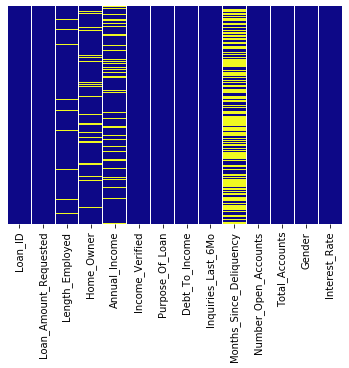

In [168]:
# Excuse me, can we have a plot please?!
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'plasma')

OK! The rule of thumb is that it is better to impute the missing values rather than ditch the features altogether. After all, there is still some info hidden in these features... After the following analysis, we will conclude that we can easily impute these missing values.

In [169]:
train.describe(include = 'all')

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
count,1.643090e+05,164309.00000,156938,138960,1.392070e+05,164309,164309,164309.000000,164309.000000,75930.000000,164309.000000,164309.000000,164309,164309.000000
unique,NaN,NaN,11,5,NaN,3,14,NaN,NaN,NaN,NaN,NaN,2,NaN
top,NaN,NaN,10,Mortgage,NaN,VERIFIED - income,debt_consolidation,NaN,NaN,NaN,NaN,NaN,Male,NaN
freq,NaN,NaN,52915,70345,NaN,59421,97101,NaN,NaN,NaN,NaN,NaN,117176,NaN
mean,1.008216e+07,14349.33692,NaN,NaN,7.333116e+04,NaN,NaN,17.207189,0.781698,34.229356,11.193818,25.067665,NaN,2.158951
std,4.743207e+04,8281.86870,NaN,NaN,6.037750e+04,NaN,NaN,7.845083,1.034747,21.761180,4.991813,11.583067,NaN,0.738364
min,1.000000e+07,500.00000,NaN,NaN,4.000000e+03,NaN,NaN,0.000000,0.000000,0.000000,0.000000,2.000000,NaN,1.000000
25%,1.004108e+07,8000.00000,NaN,NaN,4.500000e+04,NaN,NaN,11.370000,0.000000,16.000000,8.000000,17.000000,NaN,2.000000
50%,1.008216e+07,12075.00000,NaN,NaN,6.300000e+04,NaN,NaN,16.840000,0.000000,31.000000,10.000000,23.000000,NaN,2.000000
75%,1.012323e+07,20000.00000,NaN,NaN,8.869750e+04,NaN,NaN,22.780000,1.000000,50.000000,14.000000,32.000000,NaN,3.000000


Quite informative, well, apart from the NaNs, but a good idea here would be to examine each feature separately, given that they are not too many!

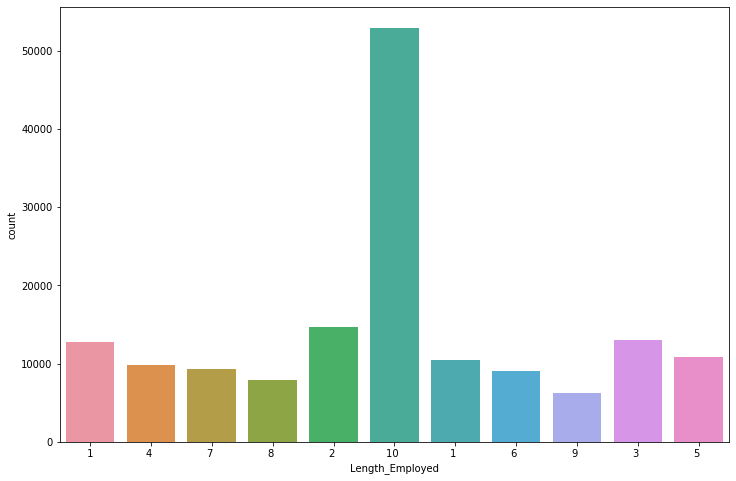

In [170]:
fig = plt.figure(figsize=(12,8))
sns.countplot(train['Length_Employed'])

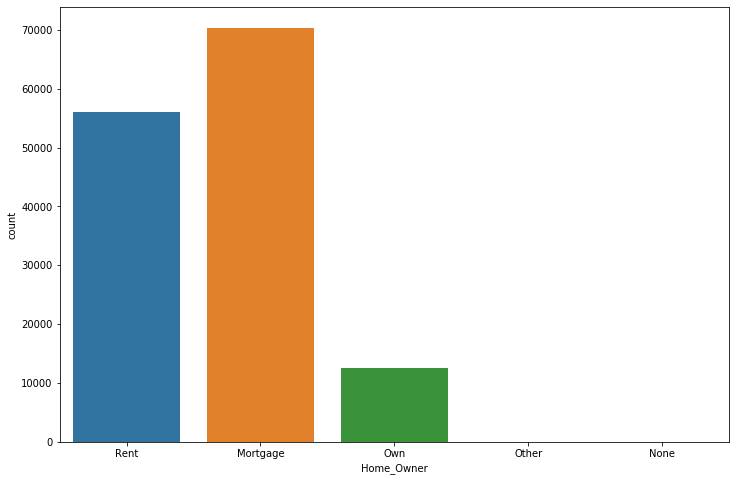

In [171]:
fig = plt.figure(figsize=(12,8))
sns.countplot(train['Home_Owner'])

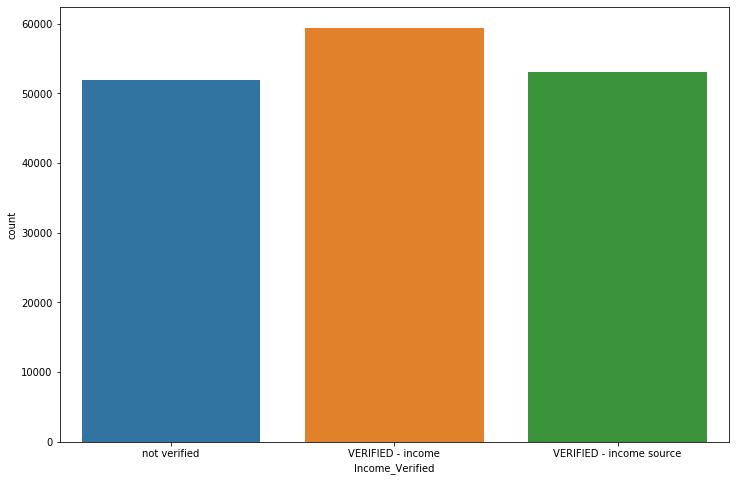

In [172]:
fig = plt.figure(figsize=(12,8))
sns.countplot(train['Income_Verified'])

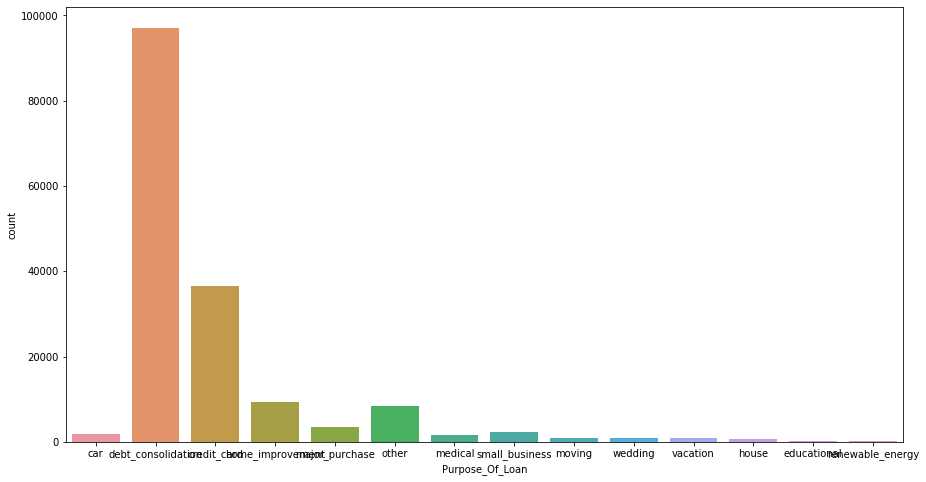

In [173]:
fig = plt.figure(figsize=(15,8))
sns.countplot(train['Purpose_Of_Loan'])

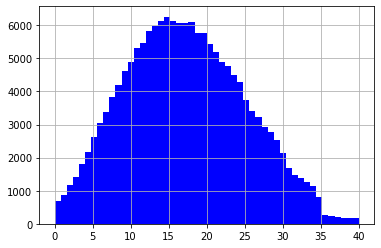

In [174]:
# Plot 'Debt_To_Income' histogram
train['Debt_To_Income'].hist(bins = 50, color = 'blue')

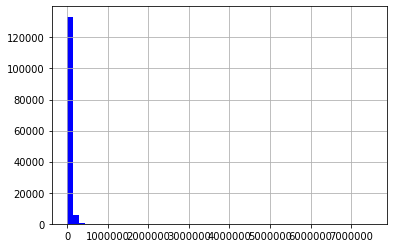

In [175]:
# Plot 'Annual_Income' histogram
train['Annual_Income'].hist(bins = 50, color = 'blue')

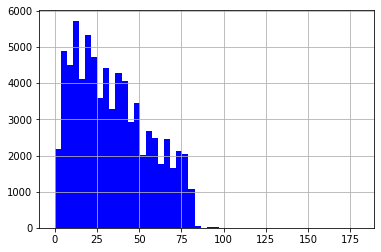

In [176]:
# Plot 'Months_Since_Deliquency' histogram
train['Months_Since_Deliquency'].hist(bins = 50, color = 'blue')

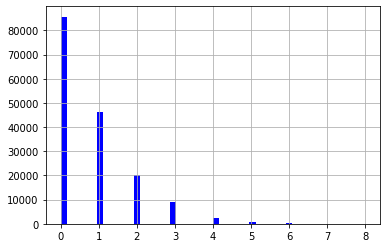

In [177]:
# Plot 'Inquiries_Last_6Mo' histogram
train['Inquiries_Last_6Mo'].hist(bins = 50, color = 'blue')

(9.0, 0.0)

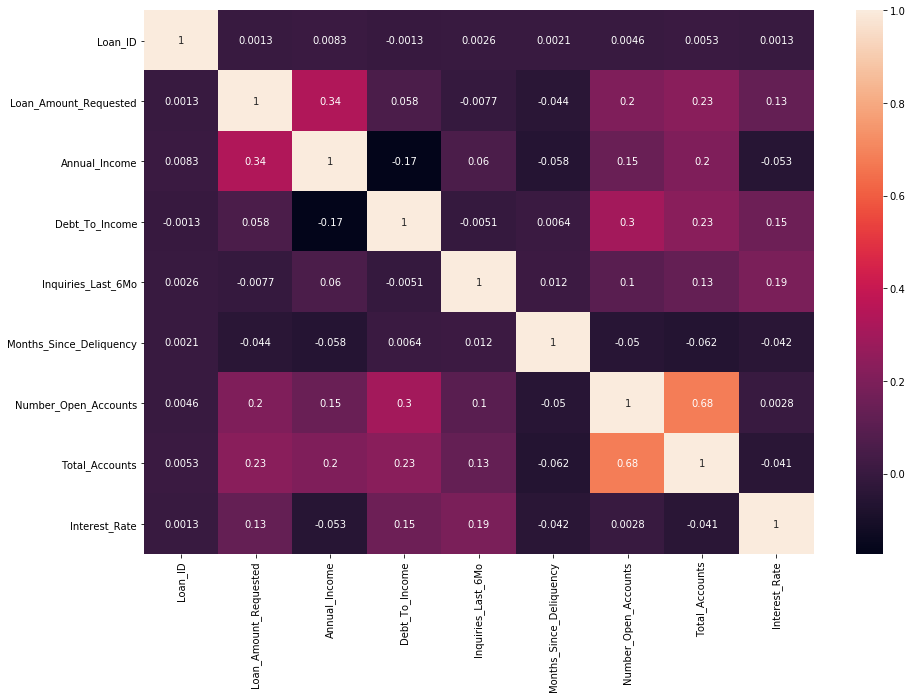

In [178]:
plt.figure(figsize = (15,10))
ax = sns.heatmap(train.corr(), annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Number_Open_Accounts and Total_Accounts are highly correlated. But fortunately the correlations are pretty low, so we don't have to worry about high multicollinearity! 

In [179]:
feature_num = train.select_dtypes(include=[np.number])
feature_num.columns

Index(['Loan_ID', 'Loan_Amount_Requested', 'Annual_Income', 'Debt_To_Income',
       'Inquiries_Last_6Mo', 'Months_Since_Deliquency', 'Number_Open_Accounts',
       'Total_Accounts', 'Interest_Rate'],
      dtype='object')

In [180]:
feature_cat = train.select_dtypes(include=[np.object])
feature_cat.columns

Index(['Length_Employed', 'Home_Owner', 'Income_Verified', 'Purpose_Of_Loan',
       'Gender'],
      dtype='object')

In [181]:
df = [train, test]

In [182]:
for dataset in df:
    dataset.drop(['Loan_ID'], axis=1, inplace=True)

In [183]:
train["Length_Employed"].fillna('NaN', inplace=True)
test["Length_Employed"].fillna('NaN', inplace=True)

train["Home_Owner"].fillna('NaN', inplace=True)
test["Home_Owner"].fillna('NaN', inplace=True)

train["Income_Verified"].fillna('NaN', inplace=True)
test["Income_Verified"].fillna('NaN', inplace=True)

train["Purpose_Of_Loan"].fillna('NaN', inplace=True)
test["Purpose_Of_Loan"].fillna('NaN', inplace=True)

train["Gender"].fillna('NaN', inplace=True)
test["Gender"].fillna('NaN', inplace=True)

train["Annual_Income"].fillna(train["Annual_Income"].mean(), inplace=True)
test["Annual_Income"].fillna(test["Annual_Income"].mean(), inplace=True)

train["Months_Since_Deliquency"].fillna(0, inplace=True)
test["Months_Since_Deliquency"].fillna(0, inplace=True)

In [184]:
test.isnull().sum().sort_values(ascending = False)

Gender                     0
Total_Accounts             0
Number_Open_Accounts       0
Months_Since_Deliquency    0
Inquiries_Last_6Mo         0
Debt_To_Income             0
Purpose_Of_Loan            0
Income_Verified            0
Annual_Income              0
Home_Owner                 0
Length_Employed            0
Loan_Amount_Requested      0
dtype: int64

In [185]:
test.shape

(109541, 12)

In [186]:
test.isnull().sum().sort_values(ascending = False)

Gender                     0
Total_Accounts             0
Number_Open_Accounts       0
Months_Since_Deliquency    0
Inquiries_Last_6Mo         0
Debt_To_Income             0
Purpose_Of_Loan            0
Income_Verified            0
Annual_Income              0
Home_Owner                 0
Length_Employed            0
Loan_Amount_Requested      0
dtype: int64

In [187]:
train.shape

(164309, 13)

In [188]:
full = pd.concat([train, test])
full.shape

(273850, 13)

In [189]:
full = pd.get_dummies(full, drop_first=True)
full.shape

(273850, 40)

In [190]:
train = full.iloc[: 164309, :]
test = full.iloc[164309: , :]
test

,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Interest_Rate,Loan_Amount_Requested,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender_Male,Home_Owner_NaN,...,Purpose_Of_Loan_home_improvement,Purpose_Of_Loan_house,Purpose_Of_Loan_major_purchase,Purpose_Of_Loan_medical,Purpose_Of_Loan_moving,Purpose_Of_Loan_other,Purpose_Of_Loan_renewable_energy,Purpose_Of_Loan_small_business,Purpose_Of_Loan_vacation,Purpose_Of_Loan_wedding
0,129000.0,12.87,0,NaN,27500,68.0,10,37,1,0,...,0,0,0,0,0,0,0,0,0,0
1,110000.0,11.37,0,NaN,26000,0.0,6,23,1,1,...,0,0,0,0,0,0,0,0,0,0
2,75000.0,6.83,2,NaN,6075,0.0,5,20,1,0,...,0,0,0,0,0,0,0,0,0,0
3,73000.0,7.76,0,NaN,12000,0.0,6,8,1,0,...,0,0,0,0,0,0,0,0,0,0
4,156000.0,9.62,0,NaN,35000,26.0,9,21,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109536,120000.0,8.15,2,NaN,15000,32.0,13,57,1,0,...,0,0,0,0,0,1,0,0,0,0
109537,125000.0,9.08,1,NaN,9600,17.0,9,34,1,0,...,0,0,0,0,0,0,0,0,0,0
109538,37850.0,11.60,0,NaN,2000,0.0,10,11,1,0,...,0,0,0,0,0,0,0,0,0,0
109539,30000.0,24.88,0,NaN,2125,0.0,5,6,1,0,...,0,0,0,0,0,1,0,0,0,0


In [191]:
from sklearn.model_selection import train_test_split

# Here is out local validation scheme!
X_train, X_test, y_train, y_test = train_test_split(train.drop(['Interest_Rate'], axis = 1), 
                                                    train['Interest_Rate'], test_size = 0.2, 
                                                    random_state = 2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(131447, 39) (32862, 39) (131447,) (32862,)


In [192]:
# We'll use a logistic regression model again, but we'll go to something more fancy soon! 
from sklearn.linear_model import LogisticRegression
logisticRegression = LogisticRegression(max_iter = 10000)
logisticRegression.fit(X_train, y_train)


LogisticRegression(max_iter=10000)

In [193]:
# Predict!
predictions = logisticRegression.predict(X_test)
# Print our preditions
print(predictions)

[2. 2. 2. ... 2. 2. 2.]


In [194]:
# Check mean
round(np.mean(predictions), 2)

2.32

In [195]:
from sklearn.model_selection import KFold

# Set our robust cross-validation scheme!
kf = KFold(n_splits = 5, random_state = 2)

In [196]:
from sklearn.model_selection import cross_val_score

# Print our CV accuracy estimate:
#print(cross_val_score(logisticRegression, X_test, y_test, cv = kf).mean())
cross_val_score(logisticRegression, train.drop(['Interest_Rate'], axis = 1),train['Interest_Rate'], cv = kf).mean()

0.4602547564017735

In [197]:
from sklearn.ensemble import RandomForestClassifier

#Initialize randomForest
randomForest = RandomForestClassifier(random_state = 2)

In [198]:
# Define our optimal randomForest algo
randomForestFinalModel = RandomForestClassifier(random_state = 2, criterion = 'gini', 
                                                max_depth = 7, max_features = 'auto', n_estimators = 300)

In [199]:
# Fit the model to the training set
randomForestFinalModel.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, n_estimators=300, random_state=2)

In [200]:
# Predict!
predictions = randomForestFinalModel.predict(X_test)

In [201]:
# Predict!
test['Interest_Rate'] = randomForestFinalModel.predict(test.drop(['Interest_Rate'], axis = 1))

In [202]:
submission_sample = pd.read_csv('sample_submission.csv')

In [203]:
dataset = pd.DataFrame({
    'Loan_ID': submission_sample['Loan_ID'],
    'Interest_Rate': test['Interest_Rate']
})

In [204]:
dataset.to_csv('output.csv', index = False)